In [1]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt

# axis ticks on grid
row = np.array([4, 8, 16, 32, 64, 128, 256, 512])
col = np.array([32, 64, 128, 256, 512, 640])

# known data points
data = np.array([
    [32066, 31512, 30458, 28548, 25367,  24029],
    [28108, 27348, 25945, 23532, 19840, 18397],
    [22542, 21631, 20015, 17413, 13819, 12526],
    [16147, 15254, 13736, 11455, 8599, 7646],
    [10302, 9596, 8440, 6801, 4898, 4297],
    [5975, 5509, 4765, 3752, 2632, 2291],
    [3247, 2975, 2547, 1978, 1367, 1184],
    [1697, 1549, 1319, 1016, 697, 602]
])

# interpolator object
interp = RegularGridInterpolator((row, col), data, method='linear')

# value at specific point, n x n
n = 60
value = interp(np.array([[n, n]]))
print(f'interpolated value at line= {n}, col= {n}:\n\t{value[0]:.2f}')
print(f'\ttau: {(1/value[0]+2e-3):.2e} s')

n = 90
value = interp(np.array([[n, n]]))
print(f'interpolated value at line= {n}, col= {n}:\n\t{value[0]:.2f}')
print(f'\ttau: {(1/value[0]+2e-3):.2e} s')


interpolated value at line= 60, col= 60:
	10394.42
	tau: 2.10e-03 s
interpolated value at line= 90, col= 90:
	7534.03
	tau: 2.13e-03 s


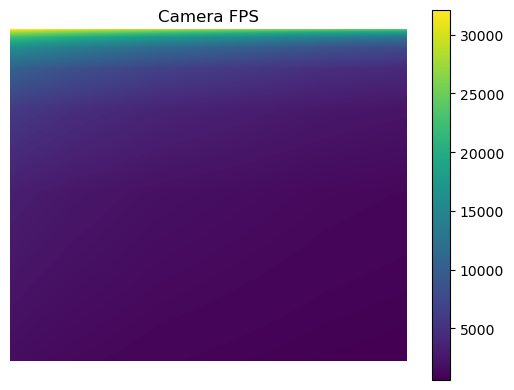

In [2]:
# verify interpolated values make sense
x = np.arange(4, 512)
y = np.arange(32, 640)
grid = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        grid[i, j] = interp([x[i], y[j]]).item()

plt.figure()
plt.title('Camera FPS')
plt.imshow(grid)
plt.colorbar()
plt.axis('off')

plt.show()


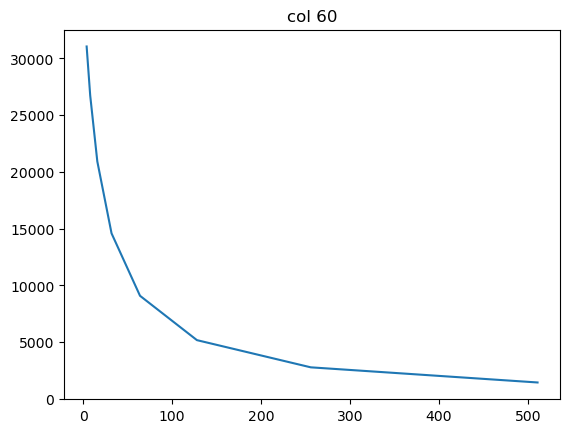

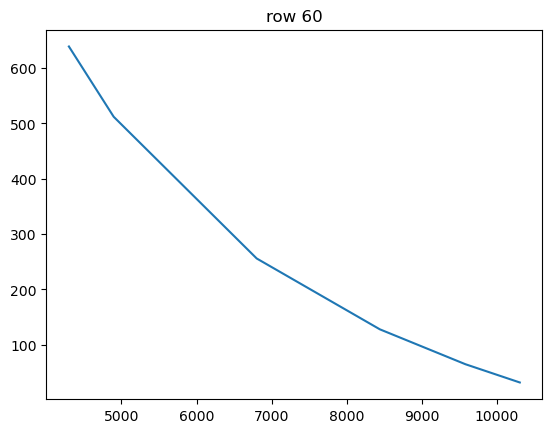

In [ ]:
plt.figure()
plt.plot(x, grid[:, 60])
plt.title('col 60')
plt.show()

plt.figure()
plt.plot(grid[60, :],y)
plt.title('row 60')
plt.show()

In [4]:
# r_0 = 10cm @ 500 nm
r_0 = 10 * (1275/500)**(6/5) * (1e-2) # meters

v = 10 # m/s
f_g = v/r_0 *.43 # times 0.43? see eqn 2.71

print(f'f_g: {f_g:.1f}Hz\n')

print('For n=60')
f_3db = 32.0 # see rtf_gui
print(f'\tf_3dB: {f_3db:.1f}Hz')
var_temp_1 = (f_g/f_3db)**(6/5)
sig_temp_1 = np.sqrt(var_temp_1)
print(f'\thigher-order wavefront error: {sig_temp_1:.3f}')

print('For n=90')
f_3db = 32.4 # see rtf_gui
print(f'\tf_3dB: {f_3db:.1f}Hz')
var_temp_2 = (f_g/f_3db)**(6/5)
sig_temp_2 = np.sqrt(var_temp_2)
print(f'\thigher-order wavefront error: {sig_temp_2:.3f}')

print(f'\ndifference: {np.abs(sig_temp_2 - sig_temp_1):.3f}')

f_g: 14.0Hz

For n=60
	f_3dB: 32.0Hz
	higher-order wavefront error: 0.609
For n=90
	f_3dB: 32.4Hz
	higher-order wavefront error: 0.604

difference: 0.005
